In [1]:
#unos potrebnih modula

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#unos podataka iz csv datoteke
train_df = pd.read_csv('nsl-kdd/KDDTrain+.txt')
test_df = pd.read_csv('nsl-kdd/KDDTest+.txt')

In [2]:
#prikazivanje strukture podataka unutar dataframea + prikaz broja redova i stupaca
#broj stupaca mora biti jednak da se mogu povezati u jedan dataframe

print(train_df, test_df)

        0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60 

In [3]:
#podaci u izvornom .csv obliku nemaju nazive stupaca pa ih treba rucno dodati

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [4]:
#unos imena stupaca u oba dataframea

train_df.columns = columns
test_df.columns = columns

In [5]:
#buduci da su dvije unesene datoteke vec podijeljene u train i test setove, model ce uvijek prediktirati identicno
#te se podatke moze povezati i kasnije dijeliti s train_test_split metodom da model moze mijenjati train i test podatke
#povezuje se concat metodom, a s ignore_index=True ce nastaviti niz indeksa vrijednosti
#u slucaju da se ne stavi, indeksi train seta ce ici od 0 do n-1 i unosom test seta ce ici opet od 0 do n-1

df = pd.concat([train_df, test_df], ignore_index=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148511,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
#provjera da li ima duplih indexa

df[df.index.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


In [7]:
#provjera da li ima "praznih" vrijednosti

df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
#prikaz nekih osnovnih parametara

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [9]:
#prikaz statistickih informacija o podacima: broj uzoraka, srednja vrijednost, standardna devijacija, najmanja vrijednost, itd.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148515.0,276.783032,2.460699e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148515.0,40228.487729,5.409648e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148515.0,17089.083722,3.703550e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148515.0,0.000215,1.467724e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148515.0,0.020523,2.400707e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148515.0,0.000202,1.941721e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148515.0,0.189382,2.013173e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148515.0,0.004323,7.224871e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148515.0,0.402794,4.904617e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148515.0,0.255065,2.223152e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [10]:
#prikaz broja uzoraka svakog tipa napada u ciljnoj varijabli 'attack'

df['attack'].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


Text(0, 0.5, 'Vrsta napada')

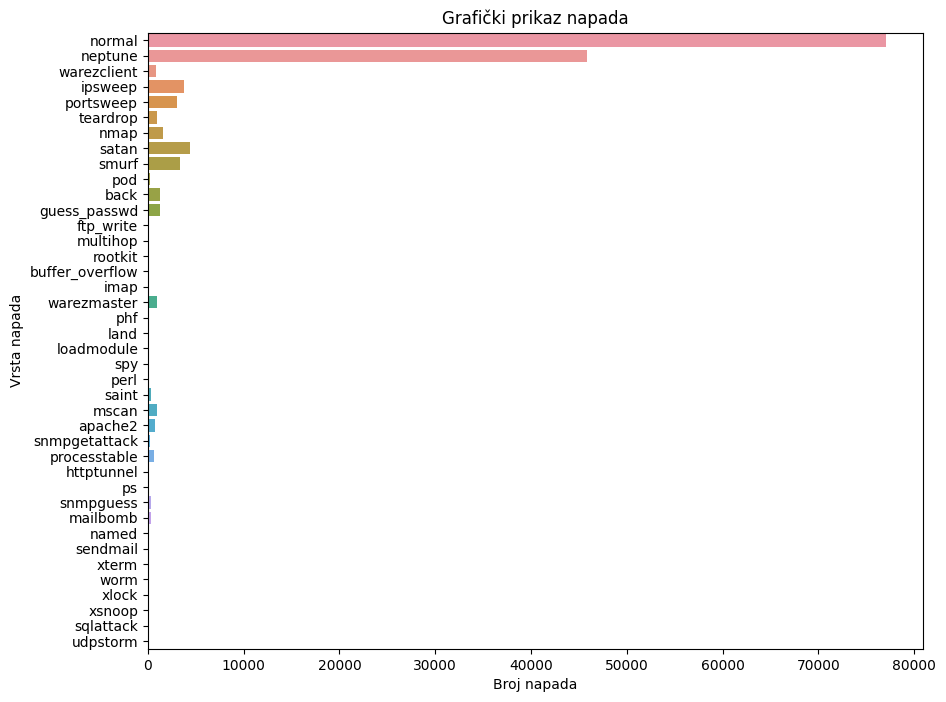

In [11]:
#seaborn knjizica je izgradjena na pyplot knjizici i njom se moze koristiti vec gotove grafove, samo se unesu vrijednost

plt.figure(figsize=(10, 8))
attack_dist = sns.countplot(data=df, y='attack')
plt.title('Grafički prikaz napada')
plt.xlabel('Broj napada')
plt.ylabel('Vrsta napada')

In [12]:
#protocol_type stupac je jedan od kandidata za graficki prikaz napada
#spajanjem podataka unutar crosstab objekta se moze jednostavno pripremiti za prikaz napada po protokolima

attacks_per_protocol = pd.crosstab(df.attack, df.protocol_type)
attacks_per_protocol

protocol_type,icmp,tcp,udp
attack,,,
apache2,0,737,0
back,0,1315,0
buffer_overflow,0,50,0
ftp_write,0,11,0
guess_passwd,0,1284,0
httptunnel,0,133,0
imap,0,12,0
ipsweep,3258,482,0
land,0,25,0


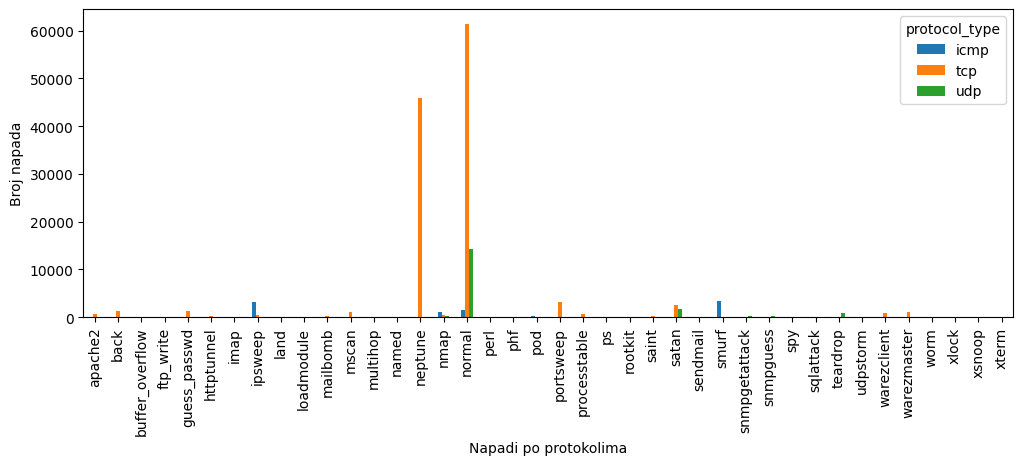

In [13]:
#graficki prikaz gore ispisanog crosstaba

app = attacks_per_protocol.plot(kind='bar', figsize=(12, 4), xlabel="Napadi po protokolima", ylabel="Broj napada")

In [14]:
#kopiranje 'attack' stupca

df['attack_classes'] = df.loc[:, 'attack'].values
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148511,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,back
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [15]:
df.service.value_counts()

http         48191
private      26626
domain_u      9937
smtp          8247
ftp_data      7710
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [16]:
df.flag.value_counts()

SF        89819
S0        36864
REJ       15082
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: flag, dtype: int64

In [17]:
#izbacivanje napada koji nisu vise aktualni: 
#satan(zamijenjen s saint alatom),
#mscan (probing tool o kojem nema nikakvih podataka)
#named (nema podataka)

#izvrsava se trazenje zadanih napada kroz dataset i izbacuje ih se van
df = df[df.attack.str.contains("satan|mscan|named")==False].copy()

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148509,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,20,smurf
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148511,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,back


In [18]:
#nakon izbacivanja gornjih podataka nastala je promjena u indeksima pa ih se treba resetirati
df.reset_index(drop=True, inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,20,smurf
143130,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143131,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143132,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,back


In [19]:
df.attack.value_counts()

normal             77053
neptune            45870
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2
Name: attack, dtype: int64

In [20]:
#unutar novog stupca ce se grupirati napade prema dokumentaciji autora dataseta
#na prethodnom grafu napada vrijednosti nisu previse vidljive zbog ogromne razlike u frekvencijama

def attack_label(dataframe):
  dataframe.attack_classes.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'DoS', inplace=True)
  dataframe.attack_classes.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L', inplace=True)      
  dataframe.attack_classes.replace(['ipsweep','nmap','portsweep','saint'],'probe', inplace=True)
  dataframe.attack_classes.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R', inplace=True)
    
attack_label(df)
df['attack_classes']

0         normal
1            DoS
2         normal
3         normal
4            DoS
           ...  
143129       DoS
143130    normal
143131    normal
143132       DoS
143133    normal
Name: attack_classes, Length: 143134, dtype: object

In [21]:
#na identican nacin se izradjuje crosstab

attacks_per_protocol2 = pd.crosstab(df.attack_classes, df.protocol_type)
attacks_per_protocol2

protocol_type,icmp,tcp,udp
attack_classes,,,
DoS,3553,48927,906
R2L,4,3345,514
U2R,0,116,3
normal,1402,61441,14210
probe,4342,4106,265


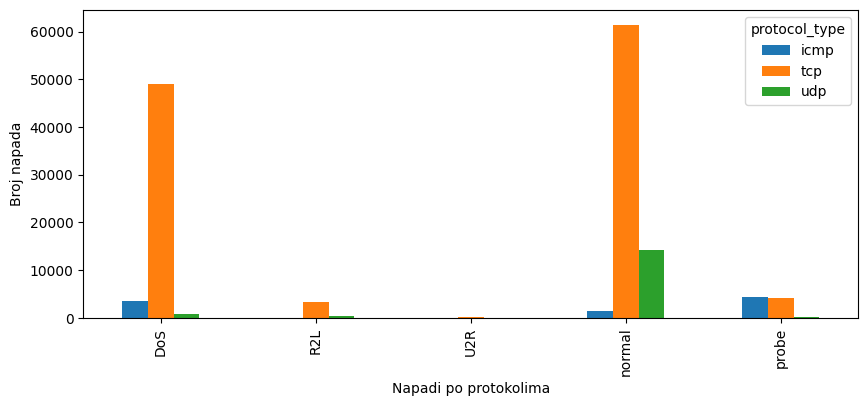

In [22]:
app2 = attacks_per_protocol2.plot(kind='bar', figsize=(10, 4), xlabel="Napadi po protokolima", ylabel="Broj napada")

In [23]:
#grafički prikaz napada po individualnim protokolima
icmp_att = attacks_per_protocol2.icmp
tcp_att = attacks_per_protocol2.tcp
udp_att = attacks_per_protocol2.udp

#unos ^ u polje za prikaz 'pie' grafova kroz 'for' petlju
pies = [icmp_att, tcp_att, udp_att]

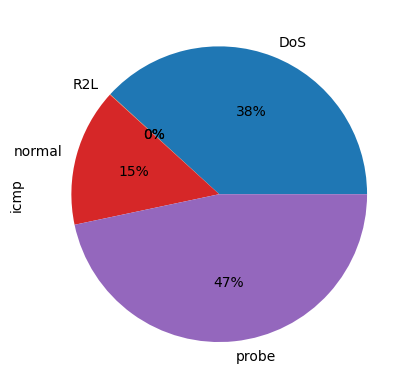

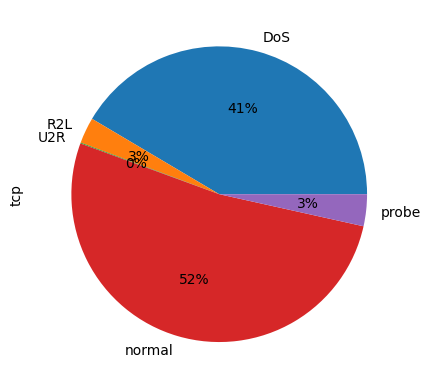

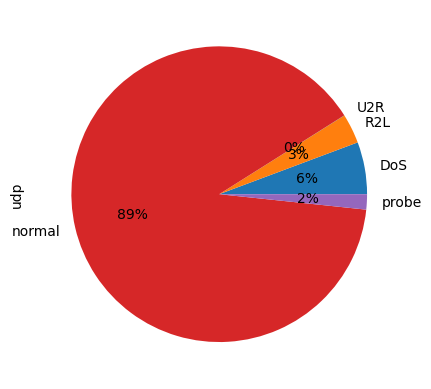

In [24]:
#for petlja i graficki prikazi s postotcima

for p in pies:
    p.plot.pie(autopct='%.0f%%')
    plt.show()

Text(0, 0.5, 'Broj napada')

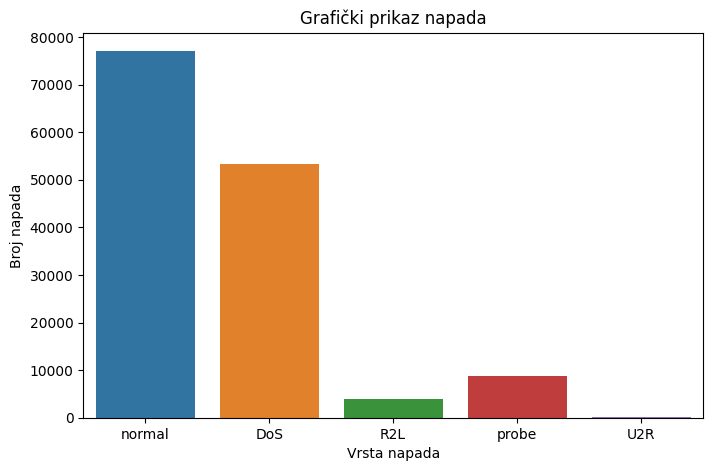

In [25]:
#također može se prikazati bar plot s kategorijama napada

plt.figure(figsize=(8, 5))
attack_dist2 = sns.countplot(data=df, x='attack_classes')
plt.title('Grafički prikaz napada')
plt.xlabel('Vrsta napada')
plt.ylabel('Broj napada')

In [26]:
#kraj analize

In [27]:
#početak modeliranja
#stupce čiji podaci nisu numeričkog tipa će se enkodirati pomocu label encoder objekta u vrijednosti 1 - n
#alternativni nacin je kodiranje vrijednosti pomoću dummies gdje bi se za svaku vrijednost napravio stupac s binarnom vrijednosti

from sklearn.preprocessing import LabelEncoder

to_encode = ['protocol_type', 'service', 'flag']

le = LabelEncoder()

df[to_encode] = df[to_encode].apply(LabelEncoder().fit_transform)
    
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,2,40,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,1,44,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
2,0,1,22,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,1,44,1,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,0,0,14,9,1032,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,20,DoS
143130,0,1,49,9,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143131,0,1,22,9,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143132,0,1,22,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,DoS


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df[columns[:40]] = ss.fit_transform(df[columns[:40]])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,-0.11464,2.287301,0.790178,0.722250,-0.007548,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,3.470208,2.416905,-0.284755,-0.605893,-0.596157,-0.389395,0.00,normal,15,normal
1,-0.11464,-0.110515,1.062579,-0.770091,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.102144,-0.467745,-0.284755,1.699707,1.708917,-0.389395,0.00,neptune,19,DoS
2,-0.11464,-0.110515,-0.435627,0.722250,-0.007532,-0.002538,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,-0.369405,0.076265,-0.536725,-0.573107,-0.389395,0.01,normal,21,normal
3,-0.11464,-0.110515,-0.435627,0.722250,-0.007538,-0.004588,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.389395,0.00,normal,21,normal
4,-0.11464,-0.110515,1.062579,-2.262431,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,0.027759,-0.467745,-0.284755,-0.605893,-0.596157,2.832285,1.00,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,-0.11464,-2.508330,-0.980429,0.722250,-0.007387,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,2.810266,-0.284755,-0.605893,-0.596157,-0.389395,0.00,smurf,20,DoS
143130,-0.11464,-0.110515,1.403080,0.722250,-0.007430,-0.004611,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.037193,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,normal,21,normal
143131,-0.11464,-0.110515,-0.435627,0.722250,-0.007517,-0.004450,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,normal,21,normal
143132,-0.11464,-0.110515,-0.435627,0.722250,0.002323,-0.002495,-0.014954,-0.087092,-0.010597,0.879684,...,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.163877,0.07,back,15,DoS


In [29]:
#grupirani napadi vise ne trebaju pa ih se izbacuje
#izvorni stupac s napadim se pretvara u binarne vrijednosti 1-napad i 0-lazni napad

#kopiranje trenutnog df-a za viseklasnu predikciju
df2 = df.copy()

attack_flag = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = attack_flag
df.drop(['attack_classes', 'attack'], axis=1, inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
0,-0.11464,2.287301,0.790178,0.722250,-0.007548,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.234575,3.470208,2.416905,-0.284755,-0.605893,-0.596157,-0.389395,0.00,15,0
1,-0.11464,-0.110515,1.062579,-0.770091,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.010674,-0.102144,-0.467745,-0.284755,1.699707,1.708917,-0.389395,0.00,19,1
2,-0.11464,-0.110515,-0.435627,0.722250,-0.007532,-0.002538,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.369405,0.076265,-0.536725,-0.573107,-0.389395,0.01,21,0
3,-0.11464,-0.110515,-0.435627,0.722250,-0.007538,-0.004588,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.389395,0.00,21,0
4,-0.11464,-0.110515,1.062579,-2.262431,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.077844,0.027759,-0.467745,-0.284755,-0.605893,-0.596157,2.832285,1.00,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,-0.11464,-2.508330,-0.980429,0.722250,-0.007387,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,2.810266,-0.284755,-0.605893,-0.596157,-0.389395,0.00,20,1
143130,-0.11464,-0.110515,1.403080,0.722250,-0.007430,-0.004611,-0.014954,-0.087092,-0.010597,-0.095790,...,0.377507,-0.037193,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,0
143131,-0.11464,-0.110515,-0.435627,0.722250,-0.007517,-0.004450,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,0
143132,-0.11464,-0.110515,-0.435627,0.722250,0.002323,-0.002495,-0.014954,-0.087092,-0.010597,0.879684,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.163877,0.07,15,1


In [30]:
#koristit ce se sljedeci algoritmi: Naive Bayes, Knn i decision tree

In [31]:
#također testirat ce se na 2 seta podataka:
# 1. podaci s korelacijom 0.5 i vise s ciljnom varijablom 'attack flag'
# 2. podaci s korelacijom izmedju 0.3 i 0.6 s ^
df1 = df.copy()

In [32]:
#prikaz matrice korelacije

df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
duration,1.000000,0.036418,0.102855,-0.055446,0.069071,0.034086,-0.001714,-0.009984,0.002389,0.000289,...,-0.111641,0.301554,0.208618,-0.027005,-0.055924,-0.054720,0.158453,0.181953,-0.135806,0.057623
protocol_type,0.036418,1.000000,0.021978,0.079819,-0.000847,-0.000514,-0.001653,0.165086,-0.001171,-0.010586,...,0.031103,0.114576,-0.254223,-0.348904,-0.068299,-0.065884,-0.033746,-0.041860,0.042412,-0.311055
service,0.102855,0.021978,1.000000,-0.289377,-0.001730,0.003370,-0.010397,0.078007,0.016793,-0.059666,...,-0.423435,0.251461,-0.131484,-0.154061,0.271745,0.272810,0.151736,0.147863,-0.009036,0.268658
flag,-0.055446,0.079819,-0.289377,1.000000,-0.007722,-0.003945,-0.011516,0.062903,0.007654,0.065989,...,0.644223,-0.195620,0.183696,0.076259,-0.431018,-0.434956,-0.703929,-0.730536,0.000845,-0.637428
src_bytes,0.069071,-0.000847,-0.001730,-0.007722,1.000000,0.000211,-0.000113,-0.000657,-0.000077,0.000321,...,-0.006736,0.001840,0.000656,-0.001492,-0.004144,-0.003113,-0.001474,0.011676,-0.018835,0.005867
dst_bytes,0.034086,-0.000514,0.003370,-0.003945,0.000211,1.000000,-0.000070,-0.000409,0.000177,-0.000313,...,-0.004437,0.013190,0.011226,-0.001186,-0.002727,-0.002669,0.010809,0.010567,-0.014341,0.003841
land,-0.001714,-0.001653,-0.010397,-0.011516,-0.000113,-0.000070,1.000000,-0.001302,-0.000158,-0.001432,...,0.009067,-0.004138,0.033293,0.072124,0.020396,0.014902,-0.005597,-0.005664,-0.028676,0.009586
wrong_fragment,-0.009984,0.165086,0.078007,0.062903,-0.000657,-0.000409,-0.001302,1.000000,-0.000923,-0.008343,...,-0.050907,0.077168,0.042212,-0.010557,-0.047129,-0.051921,0.024734,-0.032989,-0.139470,0.086823
urgent,0.002389,-0.001171,0.016793,0.007654,-0.000077,0.000177,-0.000158,-0.000923,1.000000,0.008116,...,-0.004367,0.010573,0.002431,0.005303,-0.005875,-0.006301,-0.003489,-0.000642,-0.047006,0.004357
hot,0.000289,-0.010586,-0.059666,0.065989,0.000321,-0.000313,-0.001432,-0.008343,0.008116,1.000000,...,-0.040606,-0.001186,-0.033308,-0.023821,-0.054917,-0.055814,-0.028683,-0.031917,-0.139610,-0.006145


In [33]:
#alternativni nacin prikaza korelacije s zadanom varijablom
for c in df:
    print(c, ": ", df[c].corr(df['attack_flag']))

duration :  0.05762288542998513
protocol_type :  -0.3110546263691074
service :  0.2686583001135805
flag :  -0.6374281056339409
src_bytes :  0.005867411600425175
dst_bytes :  0.0038407051426385392
land :  0.009586020675063237
wrong_fragment :  0.08682345058616162
urgent :  0.0043574450582237415
hot :  -0.006145339043684627
num_failed_logins :  0.0460779543798617
logged_in :  -0.6568210008702907
num_compromised :  -0.00965112715940078
root_shell :  -0.012201044652287652
su_attempted :  -0.0210780807080704
num_root :  -0.010918269606613245
num_file_creations :  -0.017052954512668427
num_shells :  0.0004914846841858097
num_access_files :  -0.03454247898370459
num_outbound_cmds :  nan
is_host_login :  0.0073494092805584214
is_guest_login :  0.008305042175386104
count :  0.5387860125956017
srv_count :  -0.003889351232629859
serror_rate :  0.621900116394487
srv_serror_rate :  0.6224806610074821
rerror_rate :  0.27424090359760955
srv_rerror_rate :  0.27418665799532405
same_srv_rate :  -0.70717

In [34]:
#u polje to_drop ce se unijeti stupci s korelacijom manjom od 0.4 i -0.4 s 'attack' stupcem
#da bi se utjecalo i na stupce s negativnom korelacijom, unutar kopije dataframea ce se korelacije postaviti na apsolutnu vrijednost

to_drop = []

dfc = df.copy()
for x in dfc:
    if abs(dfc[x].corr(dfc['attack_flag'])) < 0.4:
        to_drop.append(x)

#prikaz rezultata for petlje

to_drop

['duration',
 'protocol_type',
 'service',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'srv_count',
 'rerror_rate',
 'srv_rerror_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

In [35]:
#izbacivanje gore ispisanih stupaca 

df.drop(to_drop, axis=1, inplace=True)
df.corr()

,flag,logged_in,num_outbound_cmds,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_flag
flag,1.000000,0.579977,NaN,-0.442311,-0.439277,-0.439965,0.731766,0.589240,0.644223,-0.431018,-0.434956,-0.637428
logged_in,0.579977,1.000000,NaN,-0.549715,-0.487763,-0.488146,0.588477,0.611052,0.590358,-0.486517,-0.491847,-0.656821
num_outbound_cmds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,-0.442311,-0.549715,NaN,1.000000,0.460167,0.459944,-0.614982,-0.377233,-0.457684,0.463905,0.469642,0.538786
serror_rate,-0.439277,-0.487763,NaN,0.460167,1.000000,0.994592,-0.755975,-0.554416,-0.622440,0.974558,0.978509,0.621900
srv_serror_rate,-0.439965,-0.488146,NaN,0.459944,0.994592,1.000000,-0.754712,-0.554243,-0.621760,0.973674,0.982342,0.622481
same_srv_rate,0.731766,0.588477,NaN,-0.614982,-0.755975,-0.754712,1.000000,0.702480,0.788242,-0.758910,-0.766140,-0.707179
dst_host_srv_count,0.589240,0.611052,NaN,-0.377233,-0.554416,-0.554243,0.702480,1.000000,0.894756,-0.571250,-0.568322,-0.683433
dst_host_same_srv_rate,0.644223,0.590358,NaN,-0.457684,-0.622440,-0.621760,0.788242,0.894756,1.000000,-0.640870,-0.636278,-0.655723
dst_host_serror_rate,-0.431018,-0.486517,NaN,0.463905,0.974558,0.973674,-0.758910,-0.571250,-0.640870,1.000000,0.985480,0.622696


In [36]:
#num_outbound_cmds prikazuje Not-a-Number vrijednost korelacije
#najjednostavnije bi bilo izbaciti van

df.drop('num_outbound_cmds', axis=1, inplace=True)
df1.drop('num_outbound_cmds', axis=1, inplace=True)

In [37]:
#podjela na trening-test setove u omjeru 70 na trening i 30 na test
#u X ide ciljna varijabla
#u Y ide sve ostalo

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
#naive bayes

#poziv objekta algoritma
gnb = GaussianNB()

#treniranje podataka
gnb.fit(X_train, y_train)

#testiranje
gnb_predict=gnb.predict(X_test)

#prikaz preciznosti i izvjestaja
print(accuracy_score(y_test, gnb_predict))
print(classification_report(y_test, gnb_predict))

0.8630912181830884
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     23168
           1       0.93      0.76      0.84     19773

    accuracy                           0.86     42941
   macro avg       0.88      0.86      0.86     42941
weighted avg       0.87      0.86      0.86     42941



In [39]:
#dtc
#isti postupak ide i za iduce algoritme

dtc = DecisionTreeClassifier(random_state=0, max_depth=50)
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     23168
           1       0.95      0.93      0.94     19773

    accuracy                           0.95     42941
   macro avg       0.95      0.95      0.95     42941
weighted avg       0.95      0.95      0.95     42941



In [40]:
#knn
#racunanje k-vrijednosti prema nacelu k=sqrt(n)

n=int(math.sqrt(len(df)))

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     23168
           1       0.95      0.91      0.93     19773

    accuracy                           0.94     42941
   macro avg       0.94      0.93      0.93     42941
weighted avg       0.94      0.94      0.93     42941



In [41]:
#prikaz preciznosti u obliku konfuzijske matrice uz pomoc seaborna

predictions = [ gnb_predict, dtc_predict, knn_predict ]

def conf_matrix(pred, color):
    conf_matrix=confusion_matrix(y_test, pred)
    sns.heatmap(conf_matrix, annot=True, cmap=color, fmt="d")

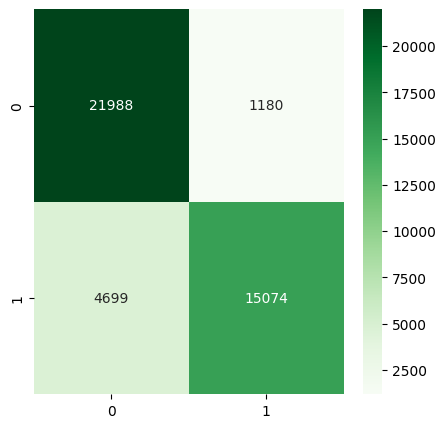

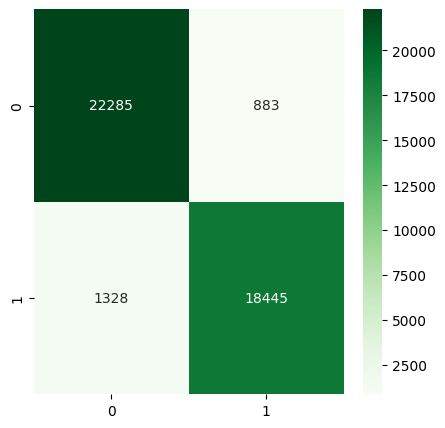

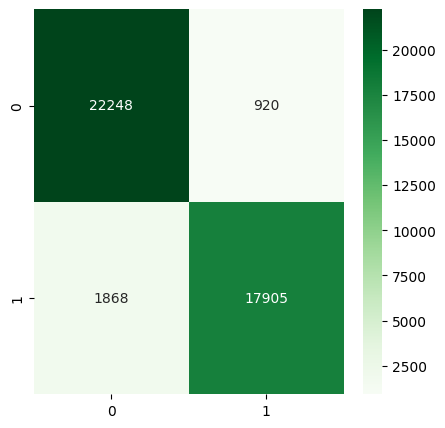

In [42]:
for p in predictions:
    plt.figure(figsize=(5, 5))
    conf_matrix(p, 'Greens')

In [43]:
#kraj prvog modela

In [44]:
#pocetak drugog modela
#za prvi model je koristen df dataframe, a za drugi se koristi df koji je kopija prvog prije svih promjena

df1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
0,-0.11464,2.287301,0.790178,0.722250,-0.007548,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.234575,3.470208,2.416905,-0.284755,-0.605893,-0.596157,-0.389395,0.00,15,0
1,-0.11464,-0.110515,1.062579,-0.770091,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.010674,-0.102144,-0.467745,-0.284755,1.699707,1.708917,-0.389395,0.00,19,1
2,-0.11464,-0.110515,-0.435627,0.722250,-0.007532,-0.002538,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.369405,0.076265,-0.536725,-0.573107,-0.389395,0.01,21,0
3,-0.11464,-0.110515,-0.435627,0.722250,-0.007538,-0.004588,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.389395,0.00,21,0
4,-0.11464,-0.110515,1.062579,-2.262431,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.077844,0.027759,-0.467745,-0.284755,-0.605893,-0.596157,2.832285,1.00,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,-0.11464,-2.508330,-0.980429,0.722250,-0.007387,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,2.810266,-0.284755,-0.605893,-0.596157,-0.389395,0.00,20,1
143130,-0.11464,-0.110515,1.403080,0.722250,-0.007430,-0.004611,-0.014954,-0.087092,-0.010597,-0.095790,...,0.377507,-0.037193,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,0
143131,-0.11464,-0.110515,-0.435627,0.722250,-0.007517,-0.004450,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,0
143132,-0.11464,-0.110515,-0.435627,0.722250,0.002323,-0.002495,-0.014954,-0.087092,-0.010597,0.879684,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.163877,0.07,15,1


In [45]:
#testiranje s podacima s korelacijom izmedju 0.3 i 0.6 naspram ciljne varijable

In [46]:
#isti postupak izbacivanja stupaca kao u prvom modelu, samo su ciljne korelacije drukcije

to_drop = []

df1_corr = df1.copy()
for x in df1_corr:
    if abs(df1_corr[x].corr(df1_corr['attack_flag'])) < 0.2:
        to_drop.append(x)
    elif abs(df1_corr[x].corr(df1_corr['attack_flag'])) > 0.55:
        to_drop.append(x)

#ciljna varijabla 'attack_flag' ce se naci u arrayu za izbacivanje jer ima korelaciju 1 sa sobom u matrici
#stoga ju treba izbaciti
#nalazi se na zadnjem mjestu u polju
    
to_drop

['duration',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'attack_flag']

In [47]:
#ciljna varijabla 'attack_flag' ce se naci u arrayu za izbacivanje jer ima korelaciju 1 sa sobom u matrici
#stoga ju treba izbaciti
#nalazi se na zadnjem mjestu u polju

to_drop = to_drop[:-1]   
df1.drop(to_drop, axis=1, inplace=True)
df1.corr()

,protocol_type,service,count,rerror_rate,srv_rerror_rate,dst_host_count,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
protocol_type,1.000000,0.021978,-0.039887,-0.041460,-0.041682,0.218763,-0.033746,-0.041860,0.042412,-0.311055
service,0.021978,1.000000,0.082971,0.143340,0.141948,0.190945,0.151736,0.147863,-0.009036,0.268658
count,-0.039887,0.082971,1.000000,0.132558,0.131397,0.455354,0.151453,0.139096,0.015018,0.538786
rerror_rate,-0.041460,0.143340,0.132558,1.000000,0.992847,0.093993,0.925075,0.960344,-0.065209,0.274241
srv_rerror_rate,-0.041682,0.141948,0.131397,0.992847,1.000000,0.095081,0.919460,0.962169,-0.067140,0.274187
dst_host_count,0.218763,0.190945,0.455354,0.093993,0.095081,1.000000,0.097363,0.089731,0.001813,0.366049
dst_host_rerror_rate,-0.033746,0.151736,0.151453,0.925075,0.919460,0.097363,1.000000,0.936519,-0.062333,0.271781
dst_host_srv_rerror_rate,-0.041860,0.147863,0.139096,0.960344,0.962169,0.089731,0.936519,1.000000,-0.049833,0.272321
level,0.042412,-0.009036,0.015018,-0.065209,-0.067140,0.001813,-0.062333,-0.049833,1.000000,-0.366922
attack_flag,-0.311055,0.268658,0.538786,0.274241,0.274187,0.366049,0.271781,0.272321,-0.366922,1.000000


In [48]:
#podjela podataka

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #random_state=42)

In [49]:
#naive bayes
gnb.fit(X_train, y_train)
gnb_predict=gnb.predict(X_test)
print(classification_report(y_test, gnb_predict))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81     15483
           1       0.86      0.59      0.70     13144

    accuracy                           0.77     28627
   macro avg       0.79      0.75      0.75     28627
weighted avg       0.79      0.77      0.76     28627



In [50]:
# 2. stablo odlucivanja 
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15483
           1       0.99      0.99      0.99     13144

    accuracy                           0.99     28627
   macro avg       0.99      0.99      0.99     28627
weighted avg       0.99      0.99      0.99     28627



In [51]:
#knn
#prethodno je definirana vrijednost k kod prvog knn objekta

knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15483
           1       0.96      0.98      0.97     13144

    accuracy                           0.97     28627
   macro avg       0.97      0.97      0.97     28627
weighted avg       0.97      0.97      0.97     28627



In [52]:
predictions = [ gnb_predict, dtc_predict, knn_predict ]

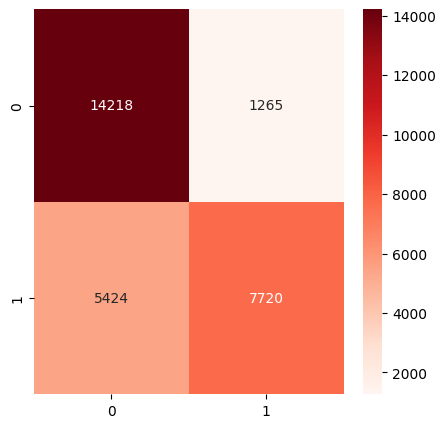

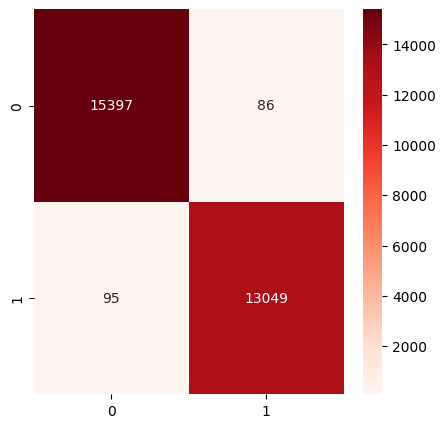

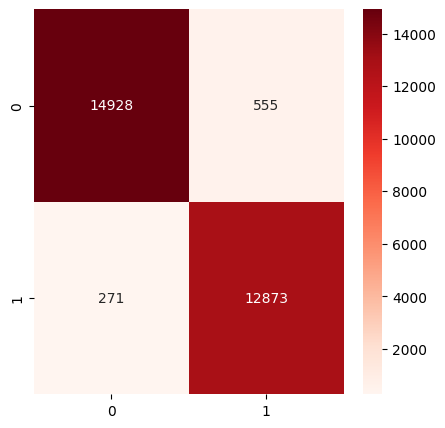

In [53]:
for p in predictions:
    plt.figure(figsize=(5, 5))
    conf_matrix(p, 'Reds')

In [54]:
#viseklasno

In [55]:
df2.drop('attack', axis=1, inplace=True)
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_classes
0,-0.11464,2.287301,0.790178,0.722250,-0.007548,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.234575,3.470208,2.416905,-0.284755,-0.605893,-0.596157,-0.389395,0.00,15,normal
1,-0.11464,-0.110515,1.062579,-0.770091,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.010674,-0.102144,-0.467745,-0.284755,1.699707,1.708917,-0.389395,0.00,19,DoS
2,-0.11464,-0.110515,-0.435627,0.722250,-0.007532,-0.002538,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.369405,0.076265,-0.536725,-0.573107,-0.389395,0.01,21,normal
3,-0.11464,-0.110515,-0.435627,0.722250,-0.007538,-0.004588,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.389395,0.00,21,normal
4,-0.11464,-0.110515,1.062579,-2.262431,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.077844,0.027759,-0.467745,-0.284755,-0.605893,-0.596157,2.832285,1.00,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,-0.11464,-2.508330,-0.980429,0.722250,-0.007387,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,2.810266,-0.284755,-0.605893,-0.596157,-0.389395,0.00,20,DoS
143130,-0.11464,-0.110515,1.403080,0.722250,-0.007430,-0.004611,-0.014954,-0.087092,-0.010597,-0.095790,...,0.377507,-0.037193,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,normal
143131,-0.11464,-0.110515,-0.435627,0.722250,-0.007517,-0.004450,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,normal
143132,-0.11464,-0.110515,-0.435627,0.722250,0.002323,-0.002495,-0.014954,-0.087092,-0.010597,0.879684,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.163877,0.07,15,DoS


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143134 entries, 0 to 143133
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     143134 non-null  float64
 1   protocol_type                143134 non-null  float64
 2   service                      143134 non-null  float64
 3   flag                         143134 non-null  float64
 4   src_bytes                    143134 non-null  float64
 5   dst_bytes                    143134 non-null  float64
 6   land                         143134 non-null  float64
 7   wrong_fragment               143134 non-null  float64
 8   urgent                       143134 non-null  float64
 9   hot                          143134 non-null  float64
 10  num_failed_logins            143134 non-null  float64
 11  logged_in                    143134 non-null  float64
 12  num_compromised              143134 non-null  float64
 13 

In [57]:
#df2 = df2.drop(columns[0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 41], axis = 1, inplace=True)

df2 = df2.drop(df2.columns[4:22], axis = 1)
df2 = df2.drop(['duration', 'level'], axis=1)

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143134 entries, 0 to 143133
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                143134 non-null  float64
 1   service                      143134 non-null  float64
 2   flag                         143134 non-null  float64
 3   count                        143134 non-null  float64
 4   srv_count                    143134 non-null  float64
 5   serror_rate                  143134 non-null  float64
 6   srv_serror_rate              143134 non-null  float64
 7   rerror_rate                  143134 non-null  float64
 8   srv_rerror_rate              143134 non-null  float64
 9   same_srv_rate                143134 non-null  float64
 10  diff_srv_rate                143134 non-null  float64
 11  srv_diff_host_rate           143134 non-null  float64
 12  dst_host_count               143134 non-null  float64
 13 

In [59]:
df2

,protocol_type,service,flag,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_classes
0,2.287301,0.790178,0.722250,-0.602633,-0.366540,-0.603715,-0.601533,-0.376237,-0.377164,-1.410106,...,-1.097037,-1.234575,3.470208,2.416905,-0.284755,-0.605893,-0.596157,-0.389395,0.00,normal
1,-0.110515,1.062579,-0.770091,0.397450,-0.301240,1.684076,1.687794,-0.376237,-0.377164,-1.479634,...,-0.872549,-1.010674,-0.102144,-0.467745,-0.284755,1.699707,1.708917,-0.389395,0.00,DoS
2,-0.110515,-0.435627,0.722250,-0.675366,-0.314300,-0.146157,-0.143667,-0.376237,-0.377164,0.722078,...,1.183764,1.004427,-0.426904,-0.369405,0.076265,-0.536725,-0.573107,-0.389395,0.01,normal
3,-0.110515,-0.435627,0.722250,-0.448074,0.038323,-0.603715,-0.601533,-0.376237,-0.377164,0.722078,...,1.183764,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.389395,0.00,normal
4,-0.110515,1.062579,-2.262431,0.379266,-0.131458,-0.603715,-0.601533,2.705362,2.701749,-1.224699,...,-0.935406,-1.077844,0.027759,-0.467745,-0.284755,-0.605893,-0.596157,2.832285,1.00,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,-2.508330,-0.980429,0.722250,-0.238966,0.312584,-0.603715,-0.601533,-0.376237,-0.377164,0.722078,...,1.183764,1.004427,-0.426904,2.810266,-0.284755,-0.605893,-0.596157,-0.389395,0.00,DoS
143130,-0.110515,1.403080,0.722250,-0.711733,-0.366540,-0.603715,-0.601533,-0.376237,-0.377164,0.722078,...,0.160097,0.377507,-0.037193,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,normal
143131,-0.110515,-0.435627,0.722250,-0.702641,-0.235939,-0.603715,-0.601533,-0.376237,-0.377164,0.722078,...,1.183764,1.004427,-0.426904,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,normal
143132,-0.110515,-0.435627,0.722250,-0.675366,-0.248999,-0.603715,-0.601533,-0.376237,-0.377164,0.722078,...,1.183764,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.163877,0.07,DoS


In [60]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
gnb.fit(X_train, y_train)
gnb_predict=gnb.predict(X_test)
print(classification_report(y_test, gnb_predict))

              precision    recall  f1-score   support

         DoS       0.97      0.89      0.93     10702
         R2L       0.06      0.08      0.07       791
         U2R       0.01      0.89      0.01        36
      normal       0.92      0.64      0.75     15285
       probe       0.59      0.85      0.69      1813

    accuracy                           0.73     28627
   macro avg       0.51      0.67      0.49     28627
weighted avg       0.89      0.73      0.80     28627



In [62]:
dtc = DecisionTreeClassifier(max_depth=50)
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     10702
         R2L       0.88      0.87      0.87       791
         U2R       0.47      0.22      0.30        36
      normal       0.99      0.99      0.99     15285
       probe       0.99      0.99      0.99      1813

    accuracy                           0.99     28627
   macro avg       0.86      0.81      0.83     28627
weighted avg       0.99      0.99      0.99     28627



In [63]:
knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.p

              precision    recall  f1-score   support

         DoS       0.98      0.96      0.97     10702
         R2L       0.78      0.53      0.63       791
         U2R       0.00      0.00      0.00        36
      normal       0.95      0.98      0.97     15285
       probe       0.91      0.95      0.93      1813

    accuracy                           0.96     28627
   macro avg       0.73      0.68      0.70     28627
weighted avg       0.96      0.96      0.96     28627



/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
predictions = [ gnb_predict, dtc_predict, knn_predict ]

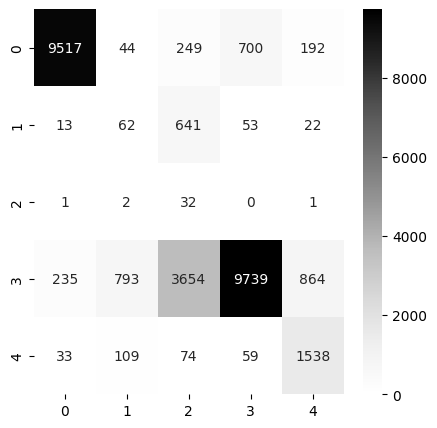

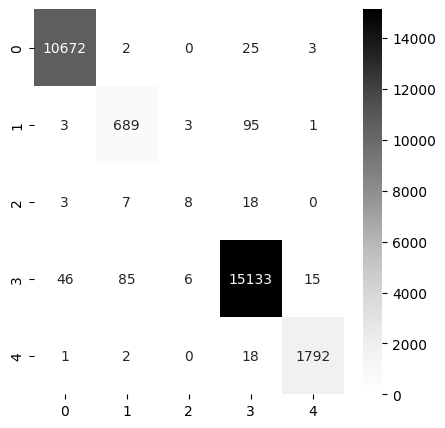

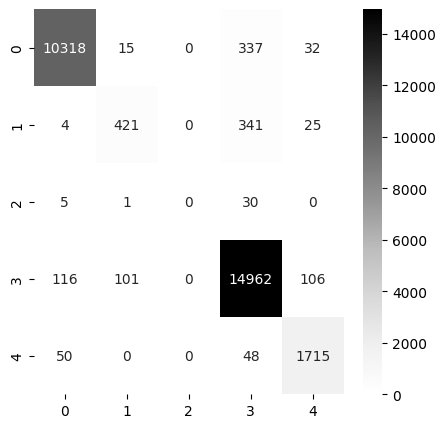

In [65]:
for p in predictions:
    plt.figure(figsize=(5, 5))
    conf_matrix(p, 'Greys')

In [66]:
df2['attack_classes'].value_counts()

normal    77053
DoS       53386
probe      8713
R2L        3863
U2R         119
Name: attack_classes, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

In [68]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

normal    61768
DoS       42684
probe      6900
R2L        3072
U2R          83
Name: attack_classes, dtype: int64
DoS       61768
normal    61768
probe     61768
R2L       61768
U2R       61768
Name: attack_classes, dtype: int64


In [69]:
gnb.fit(X_train_resampled, y_train_resampled)
gnb_predict=gnb.predict(X_test)
print(classification_report(y_test, gnb_predict))

              precision    recall  f1-score   support

         DoS       0.97      0.89      0.93     10702
         R2L       0.05      0.20      0.08       791
         U2R       0.01      0.83      0.02        36
      normal       0.93      0.60      0.73     15285
       probe       0.56      0.90      0.69      1813

    accuracy                           0.71     28627
   macro avg       0.50      0.68      0.49     28627
weighted avg       0.90      0.71      0.78     28627



In [70]:
dtc.fit(X_train_resampled, y_train_resampled)
dtc_predict=dtc.predict(X_test)
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     10702
         R2L       0.83      0.89      0.86       791
         U2R       0.24      0.39      0.30        36
      normal       0.99      0.98      0.99     15285
       probe       0.99      0.99      0.99      1813

    accuracy                           0.99     28627
   macro avg       0.81      0.85      0.83     28627
weighted avg       0.99      0.99      0.99     28627



In [71]:
sum_knn = len(X_train_resampled) + len(y_train_resampled)
n=int(math.sqrt(sum_knn))

knn.fit(X_train_resampled, y_train_resampled)
knn_predict=knn.predict(X_test)
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

         DoS       0.98      0.97      0.98     10702
         R2L       0.44      0.92      0.59       791
         U2R       0.04      0.72      0.07        36
      normal       0.99      0.89      0.93     15285
       probe       0.90      0.99      0.94      1813

    accuracy                           0.92     28627
   macro avg       0.67      0.90      0.70     28627
weighted avg       0.96      0.92      0.94     28627



In [72]:
predictions = [ gnb_predict, dtc_predict, knn_predict ]

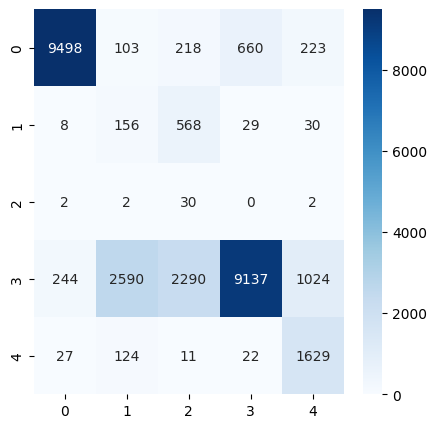

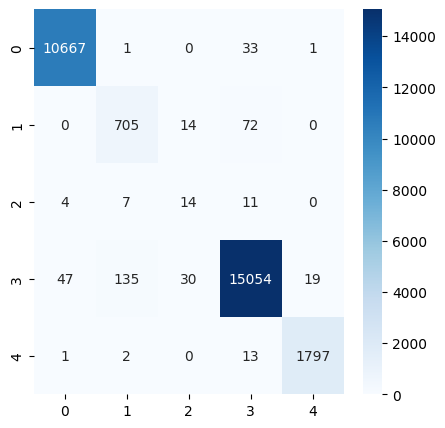

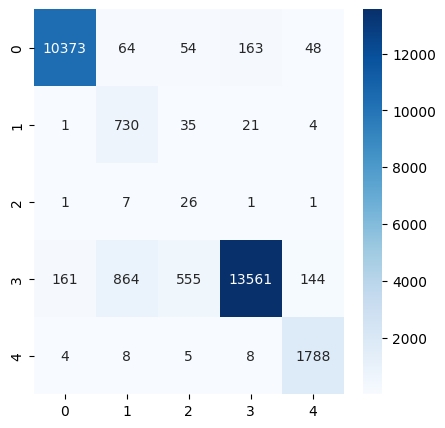

In [73]:
for p in predictions:
    plt.figure(figsize=(5, 5))
    conf_matrix(p, 'Blues')